In [30]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic', size=25)
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
df_last = pd.read_csv('0.dataSet/avg18.07.csv', encoding='utf-8')
df_last.shape

(2890, 5)

In [32]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [33]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [34]:
df_first = pd.read_csv('0.dataSet/avg15.09.csv', encoding='utf-8',  thousands=',')
df_first.shape

(24, 27)

In [35]:
df_first.head()

,□ 평균 분양가격,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"


In [36]:
pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
2885    3334.0
2886       NaN
2887    3356.0
2888    3226.0
2889    2990.0
Name: 분양가격(㎡), Length: 2890, dtype: float64

In [37]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['분양가격'].head(1)

0    5841.0
Name: 분양가격, dtype: float64

In [38]:
df_last['평당분양가격']  = df_last['분양가격'] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [39]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   int64  
 3   월        2890 non-null   int64  
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 158.2+ KB


In [40]:
# 오브젝트 타입
df_last['분양가격(㎡)'].describe()

count     2750
unique    1305
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

## <span style="color:blue">  규모구분을 전용면적 컬럼으로 변경 후 컬럼제거 </span>

In [41]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [42]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적']

0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
2885               전체
2886            60㎡이하
2887      60㎡초과 85㎡이하
2888     85㎡초과 102㎡이하
2889           102㎡초과
Name: 전용면적, Length: 2890, dtype: object

In [43]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '').str.strip()
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
2885          전체
2886         60㎡
2887     60㎡~85㎡
2888    85㎡~102㎡
2889       102㎡~
Name: 전용면적, Length: 2890, dtype: object

In [44]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   int64  
 3   월        2890 non-null   int64  
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
 7   전용면적     2890 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 180.8+ KB


In [45]:
df_last = df_last.drop(['규모구분','분양가격(㎡)'], axis=1)
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [46]:
# 지역명으로 분양가격의 평균구하기
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7428.489172
경기    12311.700000
경남     8727.580000
경북     8053.029936
광주     9274.461429
대구    11079.361146
대전     9345.840876
부산    11364.280000
서울    21961.620000
세종     9238.893168
울산    10001.762791
인천    11462.904294
전남     7278.300000
전북     7321.809202
제주    11090.753793
충남     8031.037736
충북     7422.280000
Name: 평당분양가격, dtype: float64

In [47]:
# 전용면적으로 분양가격의 평균 구하기
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       10838.840499
60㎡          9947.127933
60㎡~85㎡      9683.270588
85㎡~102㎡    10440.551046
전체           9728.811765
Name: 평당분양가격, dtype: float64

In [48]:
# 지역명과 전용면적으로 분양가격의 평균 구하기
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       7898.700
     60㎡         7195.400
     60㎡~85㎡     7228.300
     85㎡~102㎡    7685.568
     전체          7196.800
                   ...   
충북   102㎡~       7932.900
     60㎡         6969.100
     60㎡~85㎡     7044.500
     85㎡~102㎡    8170.600
     전체          6994.300
Name: 평당분양가격, Length: 85, dtype: float64

In [49]:
df_last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().round().unstack() #unstack: '지역명'인덱스 컬럼으로

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,7899.0,13647.0,9226.0,8616.0,10296.0,12334.0,14282.0,12590.0,22058.0,9292.0,9974.0,13836.0,7568.0,7842.0,10416.0,8478.0,7933.0
60㎡,7195.0,12385.0,8343.0,7661.0,8518.0,11285.0,8798.0,10707.0,22046.0,9107.0,8965.0,10870.0,6991.0,7232.0,14700.0,7782.0,6969.0
60㎡~85㎡,7228.0,11691.0,8110.0,7690.0,9176.0,10931.0,8807.0,11191.0,20781.0,9272.0,10641.0,10748.0,6968.0,6891.0,9943.0,7504.0,7044.0
85㎡~102㎡,7686.0,12130.0,9822.0,8776.0,9296.0,9589.0,9037.0,11039.0,23754.0,9245.0,8861.0,11267.0,7882.0,7770.0,10739.0,9090.0,8171.0
전체,7197.0,11706.0,8137.0,7696.0,9167.0,10897.0,8880.0,11295.0,21169.0,9263.0,10619.0,10739.0,6982.0,6902.0,10253.0,7494.0,6994.0


In [50]:
# 연도별 지역별로 분양가의 평균 구하기
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().round().unstack().T #T: 행렬 trans

연도,2015,2016,2017,2018
지역명,,,,
강원,7188.0,7163.0,7274.0,8170.0
경기,11061.0,11685.0,12305.0,13933.0
경남,8459.0,8497.0,8787.0,9145.0
경북,7464.0,7753.0,8281.0,8571.0
광주,7917.0,9191.0,9614.0,9278.0
대구,9019.0,10282.0,12207.0,11779.0
대전,8191.0,8911.0,9957.0,9384.0
부산,10377.0,10744.0,11561.0,12543.0
서울,20316.0,21753.0,21831.0,23229.0


In [51]:
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='mean')

,평당분양가격
지역명,
강원,7428.489172
경기,12311.700000
경남,8727.580000
경북,8053.029936
광주,9274.461429
대구,11079.361146
대전,9345.840876
부산,11364.280000
서울,21961.620000


In [52]:
df_last.pivot_table(index='전용면적', columns='지역명', values='평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,7899.0,13647.0,9226.0,8616.0,10296.0,12334.0,14282.0,12590.0,22058.0,9292.0,9974.0,13836.0,7568.0,7842.0,10416.0,8478.0,7933.0
60㎡,7195.0,12385.0,8343.0,7661.0,8518.0,11285.0,8798.0,10707.0,22046.0,9107.0,8965.0,10870.0,6991.0,7232.0,14700.0,7782.0,6969.0
60㎡~85㎡,7228.0,11691.0,8110.0,7690.0,9176.0,10931.0,8807.0,11191.0,20781.0,9272.0,10641.0,10748.0,6968.0,6891.0,9943.0,7504.0,7044.0
85㎡~102㎡,7686.0,12130.0,9822.0,8776.0,9296.0,9589.0,9037.0,11039.0,23754.0,9245.0,8861.0,11267.0,7882.0,7770.0,10739.0,9090.0,8171.0
전체,7197.0,11706.0,8137.0,7696.0,9167.0,10897.0,8880.0,11295.0,21169.0,9263.0,10619.0,10739.0,6982.0,6902.0,10253.0,7494.0,6994.0


In [53]:
p = pd.pivot_table(df_last, index=['연도', '지역명'], values='평당분양가격')
p.loc[2016]

,평당분양가격
지역명,
강원,7162.903846
경기,11684.970000
경남,8496.730000
경북,7753.405000
광주,9190.683333
대구,10282.030000
대전,8910.733333
부산,10743.535000
서울,21753.435000


In [54]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
2885,제주,2018,7,3334.0,11002.2,전체
2886,제주,2018,7,NaN,NaN,60㎡
2887,제주,2018,7,3356.0,11074.8,60㎡~85㎡
2888,제주,2018,7,3226.0,10645.8,85㎡~102㎡


In [55]:
df_first.drop(['□ 평균 분양가격'], axis = 1, inplace = True)

In [56]:
pd.options.display.max_columns = 100

In [57]:
def toInt(a):
    return int(a.replace(',',''))

In [58]:
df_first = pd.read_csv('0.dataSet/avg15.09.csv', encoding='utf-8', thousands = ',')
df_first = df_first.fillna('')
df_first.columns = df_first.loc[2]
df_first = df_first.loc[3:]
df_first['지역명'] = df_first['시도'] +  df_first['시군구']

df_first['지역명'] = df_first['지역명'].str.replace('6대광역시부산', '부산')
df_first['지역명'] = df_first['지역명'].str.replace('지방강원', '강원')

del df_first['시도'] 
del df_first['시군구']
del df_first['전월비']
del df_first['전년말비']
del df_first['전년동월비']
# df_first = df_first.drop([0], axis=0)
df_first.columns = ['2013년12월','2014년1월','2014년2월','2014년3월','2014년4월','2014년5월','2014년6월','2014년7월','2014년8월','2014년9월','2014년10월','2014년11월','2014년12월','2015년1월','2015년2월','2015년3월','2015년4월','2015년5월','2015년6월','2015년7월','2015년8월','2015년9월', '지역명']

for i in df_first:
    df_first[i] = df_first[i].apply(toInt)

ValueError: invalid literal for int() with base 10: '전국'

In [59]:
df_first.dtypes

2013년12월     int64
2014년1월      int64
2014년2월      int64
2014년3월      int64
2014년4월      int64
2014년5월      int64
2014년6월      int64
2014년7월      int64
2014년8월      int64
2014년9월      int64
2014년10월     int64
2014년11월     int64
2014년12월     int64
2015년1월      int64
2015년2월      int64
2015년3월      int64
2015년4월      int64
2015년5월      int64
2015년6월      int64
2015년7월      int64
2015년8월      int64
2015년9월      int64
지역명         object
dtype: object

In [60]:
df_first

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월,2015년9월,지역명
3,8059,8130,8195,8204,8289,8358,8344,8333,8395,8459,8488,8569,8584,8605,8602,8563,8613,8624,8627,8643,8678,8665,전국
4,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443,17969,서울
5,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581,9608,부산
6,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795,8863,대구
7,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449,10450,인천
8,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231,8083,광주
9,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079,7917,대전
10,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215,9215,울산
11,8151,8355,8597,8552,8585,8606,8669,8648,8700,8671,8650,8730,8698,8649,8646,8692,8858,8967,8942,8984,9058,9023,
12,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573,10341,경기


In [61]:
df_first_melt = df_first.melt(id_vars='지역명', var_name='기간', value_name='평당분양가격')
df_first_melt.head()

,지역명,기간,평당분양가격
0,전국,2013년12월,8059
1,서울,2013년12월,18189
2,부산,2013년12월,8111
3,대구,2013년12월,8080
4,인천,2013년12월,10204


In [62]:
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

In [63]:
def parse_month(date):
    month = date.split("년")[-1].replace('월', '')
    month = int(month)
    return month

In [64]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,전국,2013년12월,8059,2013


In [65]:
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,전국,2013년12월,8059,2013,12


In [66]:
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
1745,강원,2017,6,2131.0,7032.3,전체


In [67]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [68]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [69]:
# 최근데이터(df_last)에는 전용면적 존재
# 이전데이터(df_first)에는 전용면적 존재하지않음
# loc사용 전용면적 중 전체만 copy해서 df_last_prepare 변수에 추가
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [70]:
# df_first_melt에서 공통된 컬럼만 사용
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204
...,...,...,...,...
457,전남,2015,9,6245
458,경북,2015,9,7029
459,경남,2015,9,7947
460,제주,2015,9,7379


In [71]:
# df_first_prepare 와 df_last_prepare concat하기 
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1040, 4)

In [72]:
df.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059.0
1,서울,2013,12,18189.0
2,부산,2013,12,8111.0
3,대구,2013,12,8080.0
4,인천,2013,12,10204.0


In [73]:
df.astype({'연도':'str', '월': 'str'}).dtypes

지역명        object
연도         object
월          object
평당분양가격    float64
dtype: object

In [74]:
df['연도'].value_counts(sort=False)

2013     21
2014    252
2015    240
2016    204
2017    204
2018    119
Name: 연도, dtype: int64

In [75]:
# 연도를 index로, 지역명을 컬럼으로 평당분양가격을 pivotTable로 표현
t = pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
t

지역명,,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,수도권,울산,인천,전국,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,,,,
2013,7292.0,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,13083.0,8090.0,10204.0,8059.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,7613.0,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,13194.0,8362.0,10075.0,8362.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,7890.0,6855.0,10477.0,7671.0,7035.0,7967.0,8720.0,8089.0,9631.0,19173.0,8647.0,13242.0,9268.0,10291.0,8624.0,6121.0,6645.0,7458.0,7017.0,6692.0
2016,NaN,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,NaN,10209.0,10532.0,NaN,6489.0,6418.0,9129.0,7331.0,6770.0
2017,NaN,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,NaN,11345.0,10737.0,NaN,7188.0,7058.0,10831.0,7456.0,6763.0
2018,NaN,7641.0,12881.0,8894.0,8342.0,9638.0,11737.0,9604.0,12756.0,22329.0,10375.0,NaN,10422.0,11205.0,NaN,7792.0,7573.0,12492.0,7997.0,7892.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, ''),
  Text(0, 1.5, '강원'),
  Text(0, 2.5, '경기'),
  Text(0, 3.5, '경남'),
  Text(0, 4.5, '경북'),
  Text(0, 5.5, '광주'),
  Text(0, 6.5, '대구'),
  Text(0, 7.5, '대전'),
  Text(0, 8.5, '부산'),
  Text(0, 9.5, '서울'),
  Text(0, 10.5, '세종'),
  Text(0, 11.5, '수도권'),
  Text(0, 12.5, '울산'),
  Text(0, 13.5, '인천'),
  Text(0, 14.5, '전국'),
  Text(0, 15.5, '전남'),
  Text(0, 16.5, '전북'),
  Text(0, 17.5, '제주'),
  Text(0, 18.5, '충남'),
  Text(0, 19.5, '충북')])

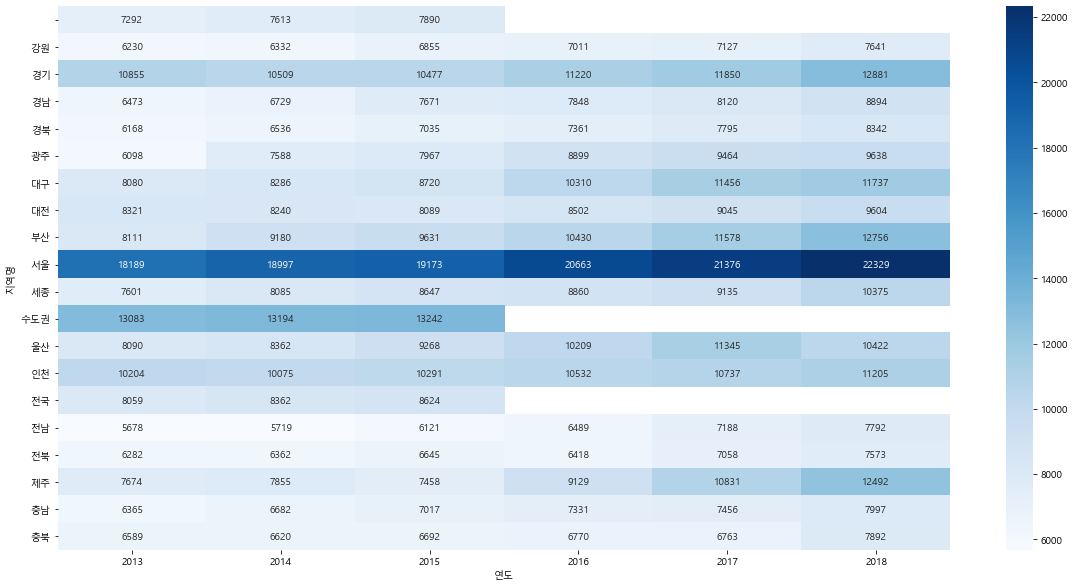

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(t.T, cmap='Blues', annot=True, fmt='.0f')
plt.yticks(rotation=0)

In [77]:
# groupby를 사용해서 heatmap그리기 
# unstack()
g = df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()
g

지역명,,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,수도권,울산,인천,전국,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,,,,
2013,7292.0,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,13083.0,8090.0,10204.0,8059.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,7613.0,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,13194.0,8362.0,10075.0,8362.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,7890.0,6855.0,10477.0,7671.0,7035.0,7967.0,8720.0,8089.0,9631.0,19173.0,8647.0,13242.0,9268.0,10291.0,8624.0,6121.0,6645.0,7458.0,7017.0,6692.0
2016,NaN,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,NaN,10209.0,10532.0,NaN,6489.0,6418.0,9129.0,7331.0,6770.0
2017,NaN,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,NaN,11345.0,10737.0,NaN,7188.0,7058.0,10831.0,7456.0,6763.0
2018,NaN,7641.0,12881.0,8894.0,8342.0,9638.0,11737.0,9604.0,12756.0,22329.0,10375.0,NaN,10422.0,11205.0,NaN,7792.0,7573.0,12492.0,7997.0,7892.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, ''),
  Text(0, 1.5, '강원'),
  Text(0, 2.5, '경기'),
  Text(0, 3.5, '경남'),
  Text(0, 4.5, '경북'),
  Text(0, 5.5, '광주'),
  Text(0, 6.5, '대구'),
  Text(0, 7.5, '대전'),
  Text(0, 8.5, '부산'),
  Text(0, 9.5, '서울'),
  Text(0, 10.5, '세종'),
  Text(0, 11.5, '수도권'),
  Text(0, 12.5, '울산'),
  Text(0, 13.5, '인천'),
  Text(0, 14.5, '전국'),
  Text(0, 15.5, '전남'),
  Text(0, 16.5, '전북'),
  Text(0, 17.5, '제주'),
  Text(0, 18.5, '충남'),
  Text(0, 19.5, '충북')])

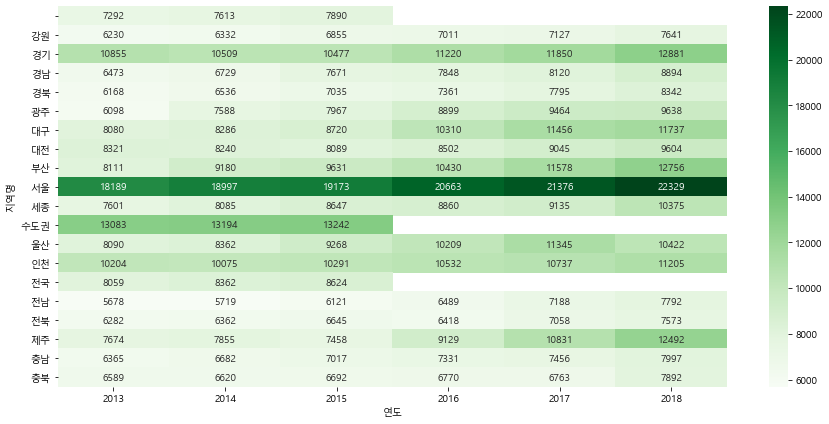

In [78]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt='.0f', cmap='Greens')

plt.yticks(rotation=0)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

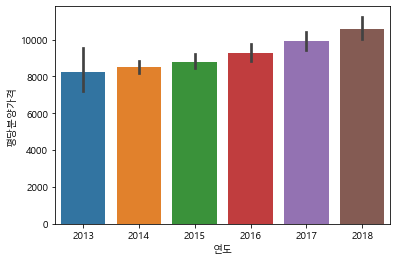

In [56]:
#barplot 평균값 / 검은막대 신뢰구간
sns.barplot(data=df, x='연도', y = '평당분양가격')

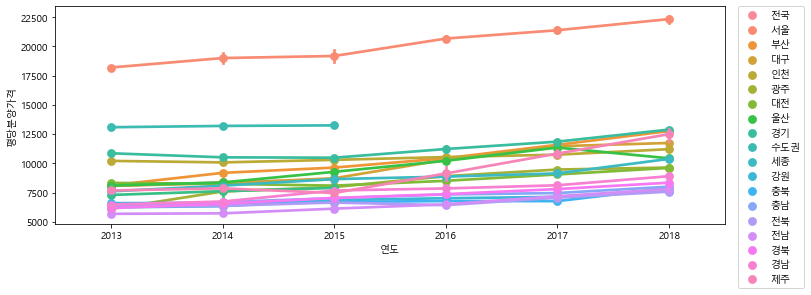

In [57]:
#지역별 평당분양가격의 증가
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

(56, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

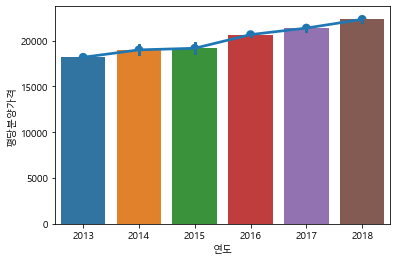

In [58]:
# 서울만 barplot으로 그리기 
df_seoul = df[df['지역명'] == '서울'].copy()
print(df_seoul.shape)

sns.barplot(data=df_seoul, x='연도', y='평당분양가격')
sns.pointplot(data=df_seoul, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

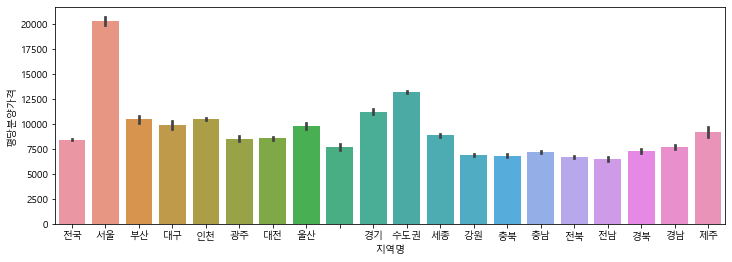

In [59]:
#barplot 지역별 평당분양가격 표현

plt.figure(figsize=(12,4))
sns.barplot(data=df, x='지역명', y='평당분양가격')